# Time Series Analysis

In [ ]:
-->The data which recorded with time is called Time Series.
-->Components of Time Series : 
    1)Seasonality : 
    2)Residuals :
    3)Stationary :
-->It will predict future values based on previously observed values.
-->Diff b/w time series and regression : 
    -->Time sreies data should be in order. in regression order is not important.
    .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()


,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [6]:
df_airline.dropna(axis=0,inplace=True)
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

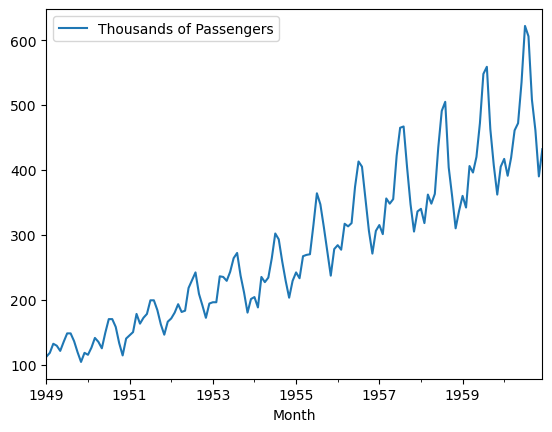

In [14]:
df_airline.plot()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [18]:
#Ho: It is non stationary (value of p)
#H1: It is stationary

def adf_test(series):
    result=adfuller(series)
    print('p- value: {}'.format(result[1]))
    
    if result[1] <=0.05:
        print("reject the null hypothesis")
    else:
        print("accept the null hypothesis")

In [19]:
adf_test(df_airline['Thousands of Passengers'])

p- value: 0.9918802434376411
accept the null hypothesis


In [20]:
## Use Techniques Differencing

df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(2)

In [21]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0


In [22]:
adf_test(df_airline['Passengers First Difference'].dropna())

p- value: 0.038629757676988535
reject the null hypothesis


In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

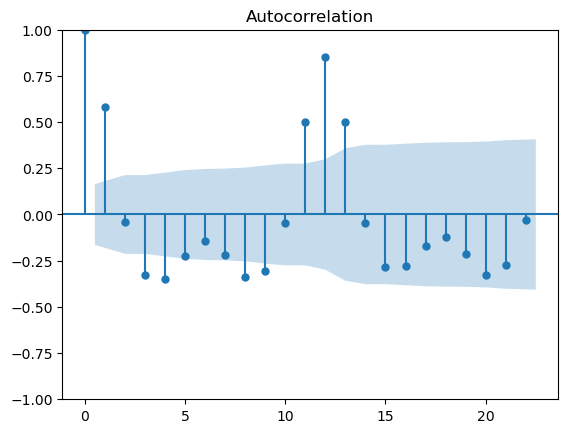

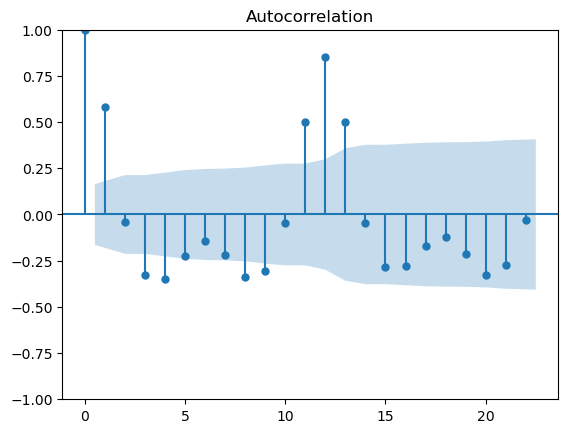

In [25]:
acf=plot_acf(df_airline["Passengers First Difference"].dropna())
pacf=plot_acf(df_airline["Passengers First Difference"].dropna())

In [26]:
### split train and test data

df_airline

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0
...,...,...
1960-08-01,606.0,71.0
1960-09-01,508.0,-114.0
1960-10-01,461.0,-145.0


In [27]:
from datetime import datetime, timedelta
train_dataset_end=datetime(1955,12,1)   # 1/1/1949 to 1/12/1955  (Training)
test_dataset_end=datetime(1960,12,1)    # 1/1/1956 to 1/12/1960  (Testing)

In [29]:
train_data=df_airline[:train_dataset_end]  #1/1/1949 to 1/12/1955

test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]   # 1/1/1956 to 1/12/1960

In [30]:
##prediction

pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [31]:
pred_start_date

Timestamp('1956-01-01 00:00:00')

In [32]:
pred_end_date

Timestamp('1960-12-01 00:00:00')

In [33]:
test_data

,Thousands of Passengers,Passengers First Difference
Month,,
1956-01-01,284.0,47.0
1956-02-01,277.0,-1.0
1956-03-01,317.0,33.0
1956-04-01,313.0,36.0
1956-05-01,318.0,1.0
1956-06-01,374.0,61.0
1956-07-01,413.0,95.0
1956-08-01,405.0,31.0
1956-09-01,355.0,-58.0


In [34]:
## create a ARIMA model

from statsmodels.tsa.arima.model import ARIMA



In [35]:
train_data

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0
...,...,...
1955-08-01,347.0,32.0
1955-09-01,312.0,-52.0
1955-10-01,274.0,-73.0


In [43]:
#import warnings
#warnings.filterwarnings('ignore')

In [46]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(14,2,12))   # (p=14(PACF),d,q(ACF))

In [47]:
model_ARIMA_fit=model_ARIMA.fit()

In [48]:
test_data

,Thousands of Passengers,Passengers First Difference
Month,,
1956-01-01,284.0,47.0
1956-02-01,277.0,-1.0
1956-03-01,317.0,33.0
1956-04-01,313.0,36.0
1956-05-01,318.0,1.0
1956-06-01,374.0,61.0
1956-07-01,413.0,95.0
1956-08-01,405.0,31.0
1956-09-01,355.0,-58.0


In [49]:
##prediction

pred_start_data=test_data.index[0]
pred_end_data=test_data.index[-1]
print(pred_start_data)
print(pred_end_data)


1956-01-01 00:00:00
1960-12-01 00:00:00


In [52]:
pred=model_ARIMA_fit.predict(start=pred_start_data,end=pred_end_data)
residuals=test_data['Thousands of Passengers']-pred

In [53]:
pred

1956-01-01    283.921009
1956-02-01    280.457012
1956-03-01    291.174231
1956-04-01    303.387503
1956-05-01    301.714838
1956-06-01    344.751072
1956-07-01    394.042672
1956-08-01    369.447184
1956-09-01    343.766869
1956-10-01    304.841624
1956-11-01    272.405270
1956-12-01    303.249541
1957-01-01    318.173649
1957-02-01    305.086303
1957-03-01    317.770819
1957-04-01    326.573248
1957-05-01    332.076197
1957-06-01    376.185935
1957-07-01    419.270522
1957-08-01    397.972180
1957-09-01    369.180684
1957-10-01    335.388942
1957-11-01    306.823539
1957-12-01    332.322189
1958-01-01    348.719531
1958-02-01    333.459754
1958-03-01    341.869959
1958-04-01    352.911574
1958-05-01    361.427612
1958-06-01    407.430007
1958-07-01    445.090545
1958-08-01    425.728547
1958-09-01    395.549851
1958-10-01    365.749924
1958-11-01    340.861863
1958-12-01    362.461841
1959-01-01    378.170945
1959-02-01    362.020817
1959-03-01    366.405396
1959-04-01    379.388742


In [54]:
residuals

Month
1956-01-01      0.078991
1956-02-01     -3.457012
1956-03-01     25.825769
1956-04-01      9.612497
1956-05-01     16.285162
1956-06-01     29.248928
1956-07-01     18.957328
1956-08-01     35.552816
1956-09-01     11.233131
1956-10-01      1.158376
1956-11-01     -1.405270
1956-12-01      2.750459
1957-01-01     -3.173649
1957-02-01     -4.086303
1957-03-01     38.229181
1957-04-01     21.426752
1957-05-01     22.923803
1957-06-01     45.814065
1957-07-01     45.729478
1957-08-01     69.027820
1957-09-01     34.819316
1957-10-01     11.611058
1957-11-01     -1.823539
1957-12-01      3.677811
1958-01-01     -8.719531
1958-02-01    -15.459754
1958-03-01     20.130041
1958-04-01     -4.911574
1958-05-01      1.572388
1958-06-01     27.569993
1958-07-01     45.909455
1958-08-01     79.271453
1958-09-01      8.450149
1958-10-01     -6.749924
1958-11-01    -30.861863
1958-12-01    -25.461841
1959-01-01    -18.170945
1959-02-01    -20.020817
1959-03-01     39.594604
1959-04-01     16.6

In [55]:
residuals.mean()

22.994307520772956

<Axes: xlabel='Month'>

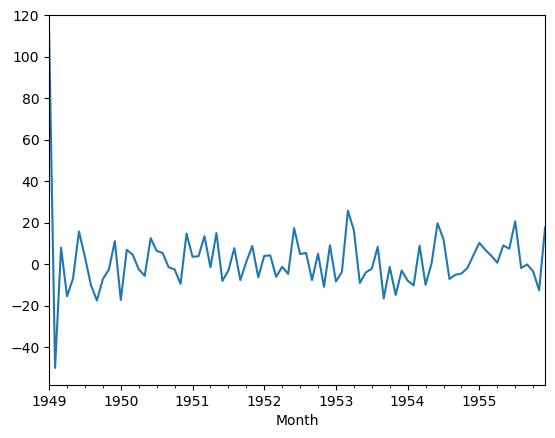

In [56]:
model_ARIMA_fit.resid.plot()

In [57]:
test_data['Predicted_ARIMA']=pred

<Axes: xlabel='Month'>

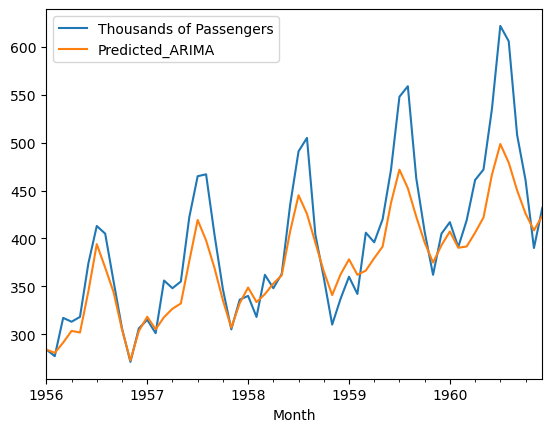

In [58]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [59]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0


In [60]:
df_airline.tail()

,Thousands of Passengers,Passengers First Difference
Month,,
1960-08-01,606.0,71.0
1960-09-01,508.0,-114.0
1960-10-01,461.0,-145.0
1960-11-01,390.0,-118.0
1960-12-01,432.0,-29.0


In [64]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_airline.index[-1]+DateOffset(months=x)for x in range(0,25)]

In [65]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_airline.columns)

In [66]:
future_datest_df.head()

,Thousands of Passengers,Passengers First Difference
1961-01-01,NaN,NaN
1961-02-01,NaN,NaN
1961-03-01,NaN,NaN
1961-04-01,NaN,NaN
1961-05-01,NaN,NaN


In [67]:
future_datest_df.tail()

,Thousands of Passengers,Passengers First Difference
1962-08-01,NaN,NaN
1962-09-01,NaN,NaN
1962-10-01,NaN,NaN
1962-11-01,NaN,NaN
1962-12-01,NaN,NaN


In [68]:
future_df=pd.concat([df_airline,future_datest_df])

In [69]:
future_df

,Thousands of Passengers,Passengers First Difference
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0
...,...,...
1962-08-01,NaN,NaN
1962-09-01,NaN,NaN
1962-10-01,NaN,NaN
1962-11-01,NaN,NaN


<Axes: >

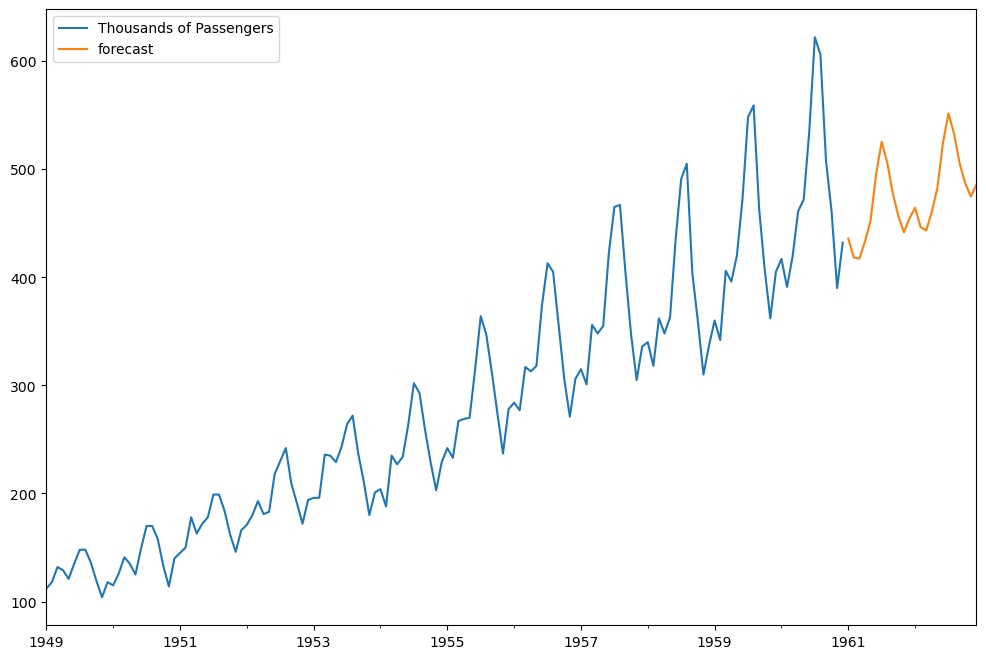

In [70]:
future_df['forecast']=model_ARIMA_fit.predict(start='1961-01-01',end='1962-12-01')
future_df[['Thousands of Passengers','forecast']].plot(figsize=(12,8))

In [71]:
future_df[['Thousands of Passengers','forecast']].tail(24)

,Thousands of Passengers,forecast
1961-01-01,NaN,435.870118
1961-02-01,NaN,418.382062
1961-03-01,NaN,417.243277
1961-04-01,NaN,433.007926
1961-05-01,NaN,452.207058
1961-06-01,NaN,495.425139
1961-07-01,NaN,525.194749
1961-08-01,NaN,505.939387
1961-09-01,NaN,477.654085
1961-10-01,NaN,456.486029
